In [1]:
import numpy
import pandas

print("NumPy version:", numpy.__version__)
print("Pandas version:", pandas.__version__)


NumPy version: 1.21.5
Pandas version: 1.4.2


In [2]:
!pip uninstall -y numpy pandas


Found existing installation: numpy 1.21.5
Uninstalling numpy-1.21.5:


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\shutil.py", line 823, in move
    os.rename(src, real_dst)
PermissionError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.21.5.dist-info\\' -> 'C:\\Users\\LENOVO\\AppData\\Local\\Temp\\pip-uninstall-o00jh2n8'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\commands\uninstall.py", line 93, in run
    uninstall_pathset = req.uninstall(
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\req\req_install.py", line 633, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 384, in rem

In [3]:
!pip install numpy==1.23.5 pandas==1.5.3


Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 5.29.4 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 5.29.4 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.


In [4]:
pip install youtube-transcript-api


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install google-api-python-client


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import re
import csv
import pandas as pd
from googleapiclient.discovery import build
from youtube_transcript_api import YouTubeTranscriptApi

In [7]:
API_KEY = 'REPLACE_WITH_YOUR_API_KEY'

In [8]:
def get_video_id(url):
    # extract video id from the URL
    video_id_match = re.search(r'(?:v=|\/)([0-9A-Za-z_-]{11}).*', url)
    return video_id_match.group(1) if video_id_match else None


In [9]:
def get_video_title(video_id):
    # build the youTube service
    youtube = build('youtube', 'v3', developerKey=API_KEY)

    # fetch the video details
    request = youtube.videos().list(
        part='snippet',
        id=video_id
    )
    response = request.execute()

    # extract the title
    title = response['items'][0]['snippet']['title'] if response['items'] else 'Unknown Title'
    return title


In [10]:
def get_video_transcript(video_id):
    # fetch the transcript
    try:
        transcript = YouTubeTranscriptApi.get_transcript(video_id)
        return transcript
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

In [11]:
def save_to_csv(title, transcript, filename):
    # save the title and transcript to a CSV file
    transcript_data = [{'start': entry['start'], 'text': entry['text']} for entry in transcript]
    df = pd.DataFrame(transcript_data)
    df.to_csv(filename, index=False)

    # save the title separately
    with open(filename, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Title:', title])

In [12]:
def main():
    url = input('Enter the YouTube video link: ')
    video_id = get_video_id(url)

    if not video_id:
        print('Invalid YouTube URL.')
        return

    title = get_video_title(video_id)
    transcript = get_video_transcript(video_id)

    if not transcript:
        print('No transcript available for this video.')
        return

    filename = f"{video_id}_transcript.csv"
    save_to_csv(title, transcript, filename)
    print(f'Transcript saved to {filename}')

if __name__ == '__main__':
    main()

Enter the YouTube video link: https://www.youtube.com/watch?v=L-QGH5JIHPY
Transcript saved to L-QGH5JIHPY_transcript.csv


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

# load the dataset
transcript_df = pd.read_csv("L-QGH5JIHPY_transcript.csv")
print(transcript_df.head())

   start                                      text
0  0.399  hey it's Tim here in today's video we're
1  1.839                     talking about Tableau
2   3.56     Einstein no no that's the wrong sorry
3    6.6       start again hey Tim here in today's
4   8.92    video we're talking about Tableau with


In [16]:
transcript_df['start'] = pd.to_numeric(transcript_df['start'], errors='coerce')

print("Dataset Overview:")
print(transcript_df.info())
print("\nBasic Statistics:")
print(transcript_df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   start   304 non-null    float64
 1   text    305 non-null    object 
dtypes: float64(1), object(1)
memory usage: 4.9+ KB
None

Basic Statistics:
            start
count  304.000000
mean   315.249007
std    181.384351
min      0.399000
25%    159.830000
50%    311.380000
75%    476.000000
max    624.760000


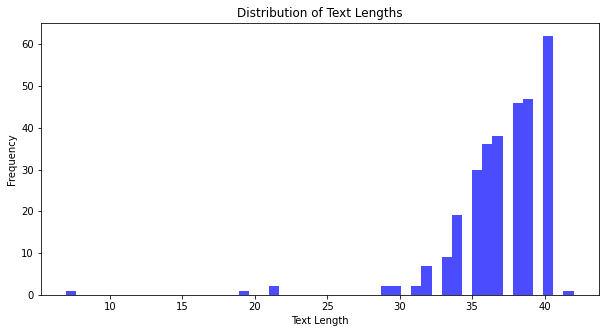

In [17]:
# distribution of text lengths
transcript_df['text_length'] = transcript_df['text'].apply(len)
plt.figure(figsize=(10, 5))
plt.hist(transcript_df['text_length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

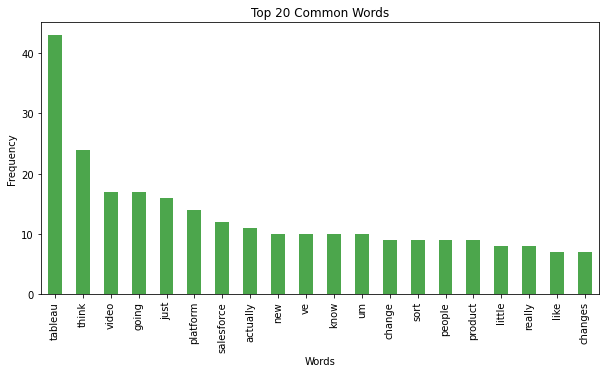

In [18]:
# most common words
vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform(transcript_df['text'])
word_counts_df = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names_out())
common_words = word_counts_df.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 5))
common_words.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 20 Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [19]:
# topic Modeling using NMF
n_features = 1000
n_topics = 10
n_top_words = 10

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(transcript_df['text'])
nmf = NMF(n_components=n_topics, random_state=42).fit(tf)
tf_feature_names = tf_vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(" ".join(topic_words))
    return topics

topics = display_topics(nmf, tf_feature_names, n_top_words)
print("\nIdentified Topics:")
for i, topic in enumerate(topics):
    print(f"Topic {i + 1}: {topic}")


Identified Topics:
Topic 1: tableau new einstein server called agent version talking vision point
Topic 2: think people changes kind way lose need scenes representation table
Topic 3: video previous hey today tim kind end experience um want
Topic 4: just um sort page funny easy thing track got happen
Topic 5: going work product make way end wasn lot best good
Topic 6: platform ve diagram product um diagrams new generally like use
Topic 7: little bit change quite confusing like sort story greek post
Topic 8: salesforce like products lot inside way issue generally possible 20
Topic 9: know people don let interesting use hands good ve really
Topic 10: actually einstein tablet thing difficult change names really podcast time


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [20]:
# get topic distribution for each text segment
topic_distribution = nmf.transform(tf)

# align the lengths by trimming the extra row in topic_distribution
topic_distribution_trimmed = topic_distribution[:len(transcript_df)]

# compute the dominant topic for each text segment
transcript_df['dominant_topic'] = topic_distribution_trimmed.argmax(axis=1)

In [21]:
# analyze the content of each text segment to manually identify logical breaks
logical_breaks = []

for i in range(1, len(transcript_df)):
    if transcript_df['dominant_topic'].iloc[i] != transcript_df['dominant_topic'].iloc[i - 1]:
        logical_breaks.append(transcript_df['start'].iloc[i])

In [22]:
# consolidate the logical breaks into broader chapters
threshold = 60  # seconds
consolidated_breaks = []
last_break = None

for break_point in logical_breaks:
    if last_break is None or break_point - last_break >= threshold:
        consolidated_breaks.append(break_point)
        last_break = break_point

In [23]:
# merge consecutive breaks with the same dominant topic
final_chapters = []
last_chapter = (consolidated_breaks[0], transcript_df['dominant_topic'][0])

for break_point in consolidated_breaks[1:]:
    current_topic = transcript_df[transcript_df['start'] == break_point]['dominant_topic'].values[0]
    if current_topic == last_chapter[1]:
        last_chapter = (last_chapter[0], current_topic)
    else:
        final_chapters.append(last_chapter)
        last_chapter = (break_point, current_topic)

final_chapters.append(last_chapter)  # append the last chapter

In [24]:
# Convert the final chapters to a readable time format
chapter_points = []
chapter_names = []

for i, (break_point, topic_idx) in enumerate(final_chapters):
    chapter_time = pd.to_datetime(break_point, unit='s').strftime('%H:%M:%S')
    chapter_points.append(chapter_time)

    # get the context for the chapter name
    chapter_text = transcript_df[(transcript_df['start'] >= break_point) & (transcript_df['dominant_topic'] == topic_idx)]['text'].str.cat(sep=' ')

    # extract key phrases to create a chapter name
    vectorizer = TfidfVectorizer(stop_words='english', max_features=3)
    tfidf_matrix = vectorizer.fit_transform([chapter_text])
    feature_names = vectorizer.get_feature_names_out()
    chapter_name = " ".join(feature_names)

    chapter_names.append(f"Chapter {i+1}: {chapter_name}")

# display the final chapter points with names
print("\nFinal Chapter Points with Names:")
for time, name in zip(chapter_points, chapter_names):
    print(f"{time} - {name}")


Final Chapter Points with Names:
00:00:01 - Chapter 1: previous today video
00:01:02 - Chapter 2: called new tableau
00:02:04 - Chapter 3: bit change little
00:03:06 - Chapter 4: context like salesforce
00:04:06 - Chapter 5: actually really tablet
00:05:08 - Chapter 6: just sort um
00:06:09 - Chapter 7: know ll people
00:07:09 - Chapter 8: ability changing new
00:08:09 - Chapter 9: actually really tablet
00:09:11 - Chapter 10: account come dunk
00:10:12 - Chapter 11: just know let
